Importing Necessary Libraries and Modules 

In [ ]:
import torch 
import torchvision 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim 
import torch.autograd as grad
import matplotlib.pyplot as plt
import numpy as np
import warnings
from augmentation import Augmentation
from model_cifar10 import Network 
from train_and_test import test,train
from utils import visualize_images, plot_graph, plot_misclassified_images, get_mean_and_std
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from __future__ import print_function
warnings.filterwarnings("ignore")

Defining Train and Test Transform for the Dataset

In [ ]:
# Transformations for Training Images
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                        transform = transforms.Compose([transforms.ToTensor()]))
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,
                                       transform=transforms.Compose([transforms.ToTensor()])) 
# Calculating Mean and Standard Deviation of the Dataset
train_dataset_mean, train_dataset_std = map(tuple, get_mean_and_std(trainset))
test_dataset_mean, test_dataset_std = map(tuple, get_mean_and_std(testset))
# Transformations for Training Images
train_transforms = transforms.Compose([
                                      #  transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                      #  transforms.RandomAffine((10.0), fill=1),
                                       transforms.ToTensor(),
                                       transforms.Normalize(train_dataset_mean, train_dataset_std)
                                       ])
# Transformations for Testing Images
test_transforms = transforms.Compose([                                    
                                       transforms.ToTensor(),
                                       transforms.Normalize(test_dataset_mean, test_dataset_std)
                                       ])

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Mean and Standard Deviation of the Train and Test Dataset

In [ ]:
print(f'Mean of the Train Dataset = {train_dataset_mean}, Standard Deviation of the Train Dataset = {train_dataset_std}')
print(f'Mean of the Test Dataset = {test_dataset_mean}, Standard Deviation of the Test Dataset = {test_dataset_std}')

Mean of the Train Dataset = (0.4914008, 0.482159, 0.44653094), Standard Deviation of the Train Dataset = (0.20230275, 0.1994131, 0.2009607)
Mean of the Test Dataset = (0.49421427, 0.4851322, 0.45040995), Standard Deviation of the Test Dataset = (0.20199372, 0.19911827, 0.20113052)


Loading the Data in Batches through DataLoader 

In [ ]:
SEED = 1
cuda = torch.cuda.is_available()
if cuda:
  torch.manual_seed(SEED)
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2, pin_memory = True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=2, pin_memory = True)

Sample Images of the Dataset

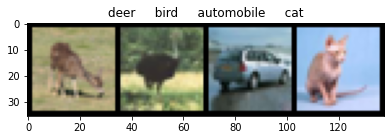

In [ ]:
images, target = next(iter(trainloader))
classes = trainset.classes
visualize_images(images, target, classes)

Model Summary

In [ ]:
model = Network()
print(model.network_architecture())

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             224
       BatchNorm2d-2            [-1, 8, 32, 32]              16
              ReLU-3            [-1, 8, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           1,168
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 32, 32, 32]           4,640
       BatchNorm2d-8           [-1, 32, 32, 32]              64
              ReLU-9           [-1, 32, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          18,496
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
        Dropout2d-13           [-1, 64, 32, 32]               0
           Conv2d-14           [-1, 64,

Visualizing Augmented Images 

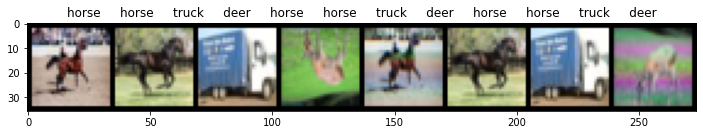

In [ ]:
model = Network()
model.train()
classes = trainset.classes
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
(images, target) = next(iter((trainloader)))
images, target = images.to(device), target.repeat(3).to(device)
augment = Augmentation(images)
augmentedImages = augment()
visualize_images(augmentedImages, target, classes, fig_size=(12, 6))

Training the Model 

---



In [ ]:
test_losses = []
test_acc = []
incorrect_prediction = []
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model =  Network().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)
EPOCHS = 40
for epoch in range(1, EPOCHS+1):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, True)
    scheduler.step()
    test(model, device, testloader, test_losses, test_acc, incorrect_prediction)

EPOCH: 1


Loss=1.6927154064178467 Batch_id=12499 Accuracy=30.10: 100%|██████████| 12500/12500 [04:17<00:00, 48.48it/s]



Test set: Average loss: 0.3767, Accuracy: 4424/10000 (44.24%)

EPOCH: 2


Loss=2.0053319931030273 Batch_id=12499 Accuracy=43.64: 100%|██████████| 12500/12500 [04:02<00:00, 51.64it/s]



Test set: Average loss: 0.2906, Accuracy: 5708/10000 (57.08%)

EPOCH: 3


Loss=1.7247352600097656 Batch_id=12499 Accuracy=50.53: 100%|██████████| 12500/12500 [04:02<00:00, 51.55it/s]



Test set: Average loss: 0.2693, Accuracy: 6088/10000 (60.88%)

EPOCH: 4


Loss=1.983599305152893 Batch_id=12499 Accuracy=54.68: 100%|██████████| 12500/12500 [04:02<00:00, 51.49it/s]



Test set: Average loss: 0.2660, Accuracy: 6120/10000 (61.20%)

EPOCH: 5


Loss=1.0311250686645508 Batch_id=12499 Accuracy=57.11: 100%|██████████| 12500/12500 [04:02<00:00, 51.59it/s]



Test set: Average loss: 0.2386, Accuracy: 6644/10000 (66.44%)

EPOCH: 6


Loss=1.4319497346878052 Batch_id=12499 Accuracy=59.38: 100%|██████████| 12500/12500 [04:00<00:00, 52.05it/s]



Test set: Average loss: 0.2205, Accuracy: 6956/10000 (69.56%)

EPOCH: 7


Loss=1.5399329662322998 Batch_id=12499 Accuracy=60.79: 100%|██████████| 12500/12500 [04:02<00:00, 51.60it/s]



Test set: Average loss: 0.2261, Accuracy: 6778/10000 (67.78%)

EPOCH: 8


Loss=1.0196062326431274 Batch_id=12499 Accuracy=62.01: 100%|██████████| 12500/12500 [04:00<00:00, 51.88it/s]



Test set: Average loss: 0.2241, Accuracy: 6905/10000 (69.05%)

EPOCH: 9


Loss=2.7868218421936035 Batch_id=12499 Accuracy=63.00: 100%|██████████| 12500/12500 [04:01<00:00, 51.74it/s]



Test set: Average loss: 0.2341, Accuracy: 6668/10000 (66.68%)

EPOCH: 10


Loss=1.380816102027893 Batch_id=12499 Accuracy=63.99: 100%|██████████| 12500/12500 [04:01<00:00, 51.72it/s]



Test set: Average loss: 0.2040, Accuracy: 7147/10000 (71.47%)

EPOCH: 11


Loss=1.6613068580627441 Batch_id=12499 Accuracy=64.54: 100%|██████████| 12500/12500 [04:00<00:00, 52.01it/s]



Test set: Average loss: 0.2138, Accuracy: 6975/10000 (69.75%)

EPOCH: 12


Loss=0.8958832621574402 Batch_id=12499 Accuracy=65.28: 100%|██████████| 12500/12500 [04:02<00:00, 51.59it/s]



Test set: Average loss: 0.2007, Accuracy: 7155/10000 (71.55%)

EPOCH: 13


Loss=1.0727941989898682 Batch_id=12499 Accuracy=65.64: 100%|██████████| 12500/12500 [04:01<00:00, 51.68it/s]



Test set: Average loss: 0.1962, Accuracy: 7275/10000 (72.75%)

EPOCH: 14


Loss=1.3216276168823242 Batch_id=12499 Accuracy=66.37: 100%|██████████| 12500/12500 [04:01<00:00, 51.66it/s]



Test set: Average loss: 0.1998, Accuracy: 7173/10000 (71.73%)

EPOCH: 15


Loss=1.8215017318725586 Batch_id=12499 Accuracy=66.89: 100%|██████████| 12500/12500 [04:00<00:00, 51.93it/s]



Test set: Average loss: 0.2062, Accuracy: 7228/10000 (72.28%)

EPOCH: 16


Loss=1.076183795928955 Batch_id=12499 Accuracy=72.02: 100%|██████████| 12500/12500 [04:02<00:00, 51.58it/s]



Test set: Average loss: 0.1675, Accuracy: 7658/10000 (76.58%)

EPOCH: 17


Loss=2.711716413497925 Batch_id=12499 Accuracy=72.96: 100%|██████████| 12500/12500 [04:02<00:00, 51.56it/s]



Test set: Average loss: 0.1665, Accuracy: 7673/10000 (76.73%)

EPOCH: 18


Loss=1.1271138191223145 Batch_id=12499 Accuracy=73.52: 100%|██████████| 12500/12500 [04:12<00:00, 49.45it/s]



Test set: Average loss: 0.1625, Accuracy: 7762/10000 (77.62%)

EPOCH: 19


Loss=1.0603893995285034 Batch_id=12499 Accuracy=73.71: 100%|██████████| 12500/12500 [04:04<00:00, 51.14it/s]



Test set: Average loss: 0.1593, Accuracy: 7776/10000 (77.76%)

EPOCH: 20


Loss=0.798352837562561 Batch_id=12499 Accuracy=73.88: 100%|██████████| 12500/12500 [04:03<00:00, 51.24it/s]



Test set: Average loss: 0.1598, Accuracy: 7834/10000 (78.34%)

EPOCH: 21


Loss=0.8583847284317017 Batch_id=12499 Accuracy=74.24: 100%|██████████| 12500/12500 [04:03<00:00, 51.42it/s]



Test set: Average loss: 0.1607, Accuracy: 7784/10000 (77.84%)

EPOCH: 22


Loss=1.3282794952392578 Batch_id=12499 Accuracy=74.30: 100%|██████████| 12500/12500 [04:02<00:00, 51.45it/s]



Test set: Average loss: 0.1605, Accuracy: 7776/10000 (77.76%)

EPOCH: 23


Loss=0.6356167793273926 Batch_id=12499 Accuracy=74.43: 100%|██████████| 12500/12500 [04:03<00:00, 51.28it/s]



Test set: Average loss: 0.1586, Accuracy: 7804/10000 (78.04%)

EPOCH: 24


Loss=0.7935084104537964 Batch_id=12499 Accuracy=74.68: 100%|██████████| 12500/12500 [04:02<00:00, 51.57it/s]



Test set: Average loss: 0.1583, Accuracy: 7816/10000 (78.16%)

EPOCH: 25


Loss=1.118950366973877 Batch_id=12499 Accuracy=74.89: 100%|██████████| 12500/12500 [04:05<00:00, 50.98it/s]



Test set: Average loss: 0.1569, Accuracy: 7861/10000 (78.61%)

EPOCH: 26


Loss=1.0823380947113037 Batch_id=12499 Accuracy=74.98: 100%|██████████| 12500/12500 [04:20<00:00, 47.90it/s]



Test set: Average loss: 0.1557, Accuracy: 7836/10000 (78.36%)

EPOCH: 27


Loss=0.8007345795631409 Batch_id=12499 Accuracy=75.20: 100%|██████████| 12500/12500 [04:21<00:00, 47.77it/s]



Test set: Average loss: 0.1560, Accuracy: 7845/10000 (78.45%)

EPOCH: 28


Loss=0.5543161630630493 Batch_id=12499 Accuracy=75.15: 100%|██████████| 12500/12500 [04:08<00:00, 50.39it/s]



Test set: Average loss: 0.1567, Accuracy: 7840/10000 (78.40%)

EPOCH: 29


Loss=0.8119161128997803 Batch_id=12499 Accuracy=75.29: 100%|██████████| 12500/12500 [04:07<00:00, 50.52it/s]



Test set: Average loss: 0.1593, Accuracy: 7827/10000 (78.27%)

EPOCH: 30


Loss=1.0715317726135254 Batch_id=12499 Accuracy=75.43: 100%|██████████| 12500/12500 [04:08<00:00, 50.38it/s]



Test set: Average loss: 0.1552, Accuracy: 7871/10000 (78.71%)

EPOCH: 31


Loss=0.9638179540634155 Batch_id=12499 Accuracy=76.71: 100%|██████████| 12500/12500 [04:05<00:00, 50.91it/s]



Test set: Average loss: 0.1500, Accuracy: 7952/10000 (79.52%)

EPOCH: 32


Loss=0.6767711639404297 Batch_id=12499 Accuracy=77.18: 100%|██████████| 12500/12500 [04:14<00:00, 49.07it/s]



Test set: Average loss: 0.1498, Accuracy: 7929/10000 (79.29%)

EPOCH: 33


Loss=0.7482537627220154 Batch_id=12499 Accuracy=77.28: 100%|██████████| 12500/12500 [04:13<00:00, 49.32it/s]



Test set: Average loss: 0.1488, Accuracy: 7930/10000 (79.30%)

EPOCH: 34


Loss=0.7177951335906982 Batch_id=12499 Accuracy=77.16: 100%|██████████| 12500/12500 [04:09<00:00, 50.09it/s]



Test set: Average loss: 0.1491, Accuracy: 7961/10000 (79.61%)

EPOCH: 35


Loss=0.5878340601921082 Batch_id=12499 Accuracy=77.27: 100%|██████████| 12500/12500 [04:06<00:00, 50.66it/s]



Test set: Average loss: 0.1490, Accuracy: 7963/10000 (79.63%)

EPOCH: 36


Loss=0.8210248947143555 Batch_id=12499 Accuracy=77.43: 100%|██████████| 12500/12500 [04:06<00:00, 50.63it/s]



Test set: Average loss: 0.1484, Accuracy: 7973/10000 (79.73%)

EPOCH: 37


Loss=1.1308162212371826 Batch_id=12499 Accuracy=77.43: 100%|██████████| 12500/12500 [04:13<00:00, 49.38it/s]



Test set: Average loss: 0.1487, Accuracy: 7953/10000 (79.53%)

EPOCH: 38


Loss=0.9188569188117981 Batch_id=12499 Accuracy=77.46: 100%|██████████| 12500/12500 [04:10<00:00, 49.83it/s]



Test set: Average loss: 0.1489, Accuracy: 7947/10000 (79.47%)

EPOCH: 39


Loss=1.2761874198913574 Batch_id=12499 Accuracy=77.48: 100%|██████████| 12500/12500 [04:08<00:00, 50.40it/s]



Test set: Average loss: 0.1485, Accuracy: 7966/10000 (79.66%)

EPOCH: 40


Loss=1.4156683683395386 Batch_id=12499 Accuracy=77.43: 100%|██████████| 12500/12500 [04:09<00:00, 50.11it/s]



Test set: Average loss: 0.1486, Accuracy: 7954/10000 (79.54%)



Plotting Validation Loss and Validation Accuracy

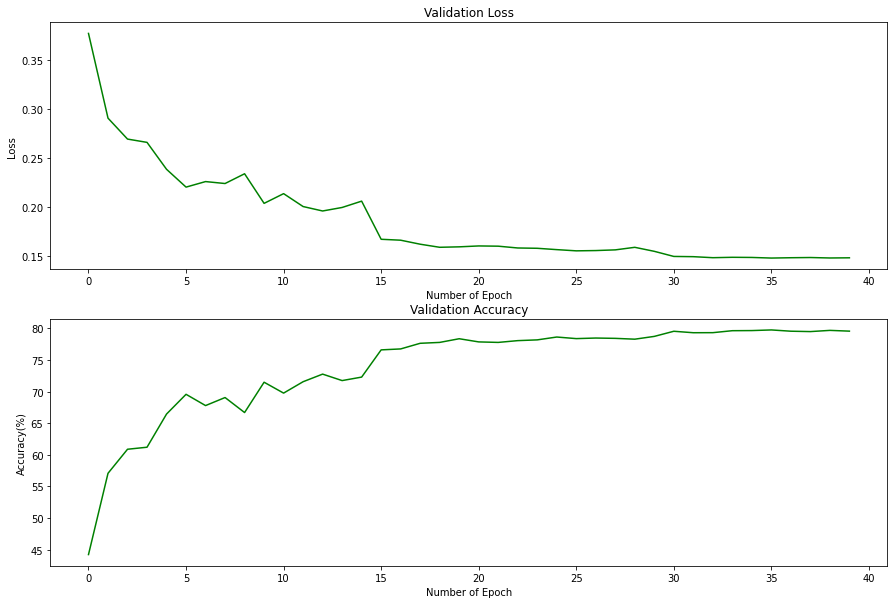

In [ ]:
plot_graph(test_losses, test_acc)

Plotting 10 Misclassified Images of Model

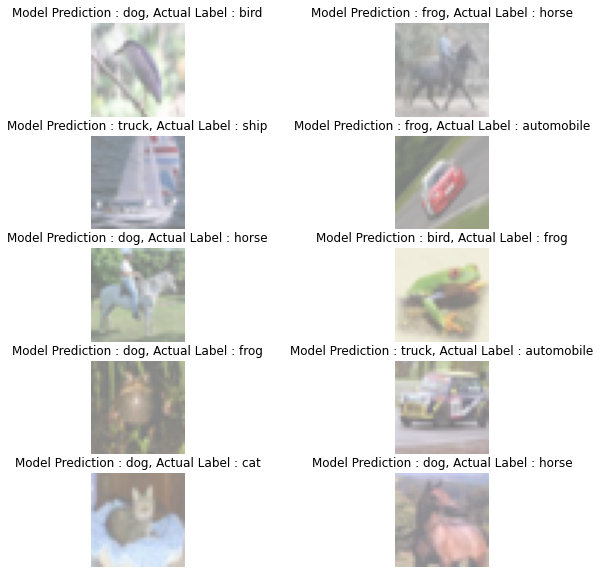

In [ ]:
classes = trainset.classes
plot_misclassified_images(incorrect_prediction, classes)